# ROI (Region of Interest) Exploration

## Purpose
Test and validate the Region of Interest mask that focuses on the road area while filtering out irrelevant parts (sky, trees, side objects).

## Workflow
1. Import libraries and ROI function from `pipeline.py`
2. Load test frames from sample dataset
3. Test ROI on single frame
4. Visualize ROI on all test frames

## ROI Parameters (from pipeline.py)
- **top_y_ratio = 0.65** - ROI top edge position (65% from top)
- **Trapezoid shape** - Wider at bottom, narrower at top to match road perspective

## 1. Import Libraries and Pipeline Function

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import sys

# Add src directory to path
sys.path.insert(0, os.path.abspath('../src'))

# Import ROI function from pipeline
from pipeline import apply_roi_mask

print("✓ Libraries and ROI function imported")

✓ Libraries and ROI function imported


## 2. Load Test Frames

In [2]:
# Test frames with diverse road conditions
test_frames = [
    "frame_t109_f6540.png",
    "frame_t12_f720.png",
    "frame_t186_f11160.png",
    "frame_t1_f60.png",
    "frame_t243_f14580.png",
    "frame_t287_f17220.png",
    "frame_t294_f17640.png",
    "frame_t9_f540.png"
]

frames_dir = "../data/frames_sample"

print(f"✓ Loaded {len(test_frames)} test frames for ROI validation")

✓ Loaded 8 test frames for ROI validation


## 3. Test ROI on Single Frame

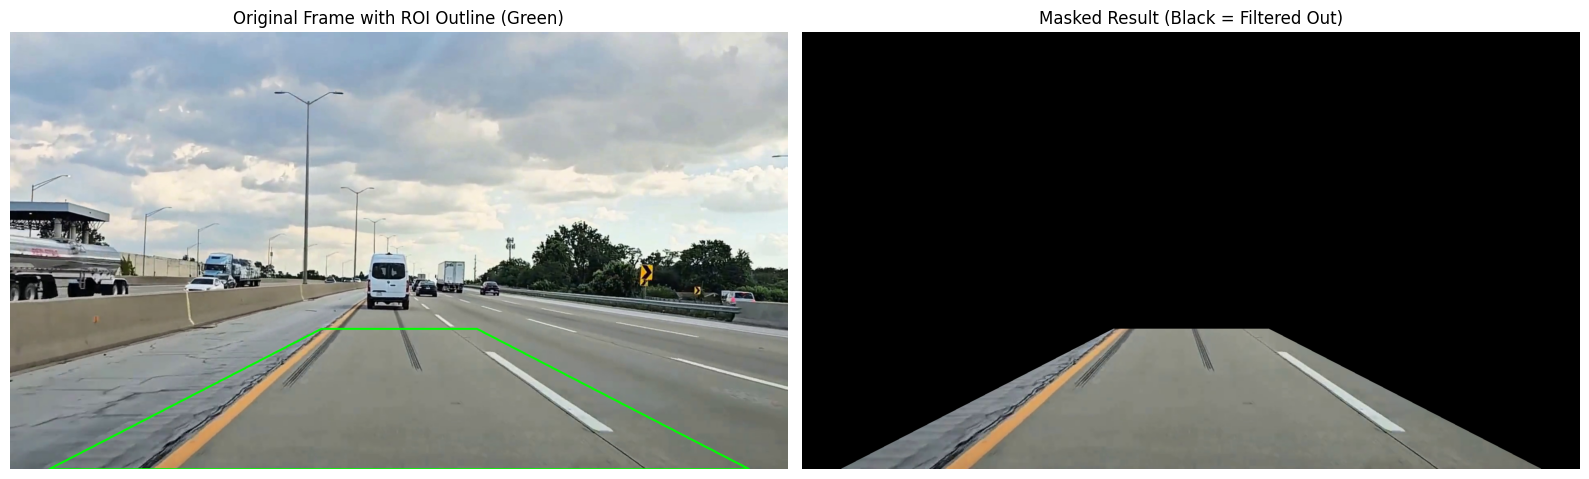

✓ ROI test complete on frame_t109_f6540.png


In [3]:
# Load first test frame
img = cv2.imread(os.path.join(frames_dir, test_frames[0]))

# Apply ROI mask
masked, roi_pts = apply_roi_mask(img)

# Visualize: original with ROI outline + masked result
vis = img.copy()
cv2.polylines(vis, roi_pts, True, (0, 255, 0), 3)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Frame with ROI Outline (Green)')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))
axes[1].set_title('Masked Result (Black = Filtered Out)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"✓ ROI test complete on {test_frames[0]}")

## 4. Visualize ROI on All Test Frames

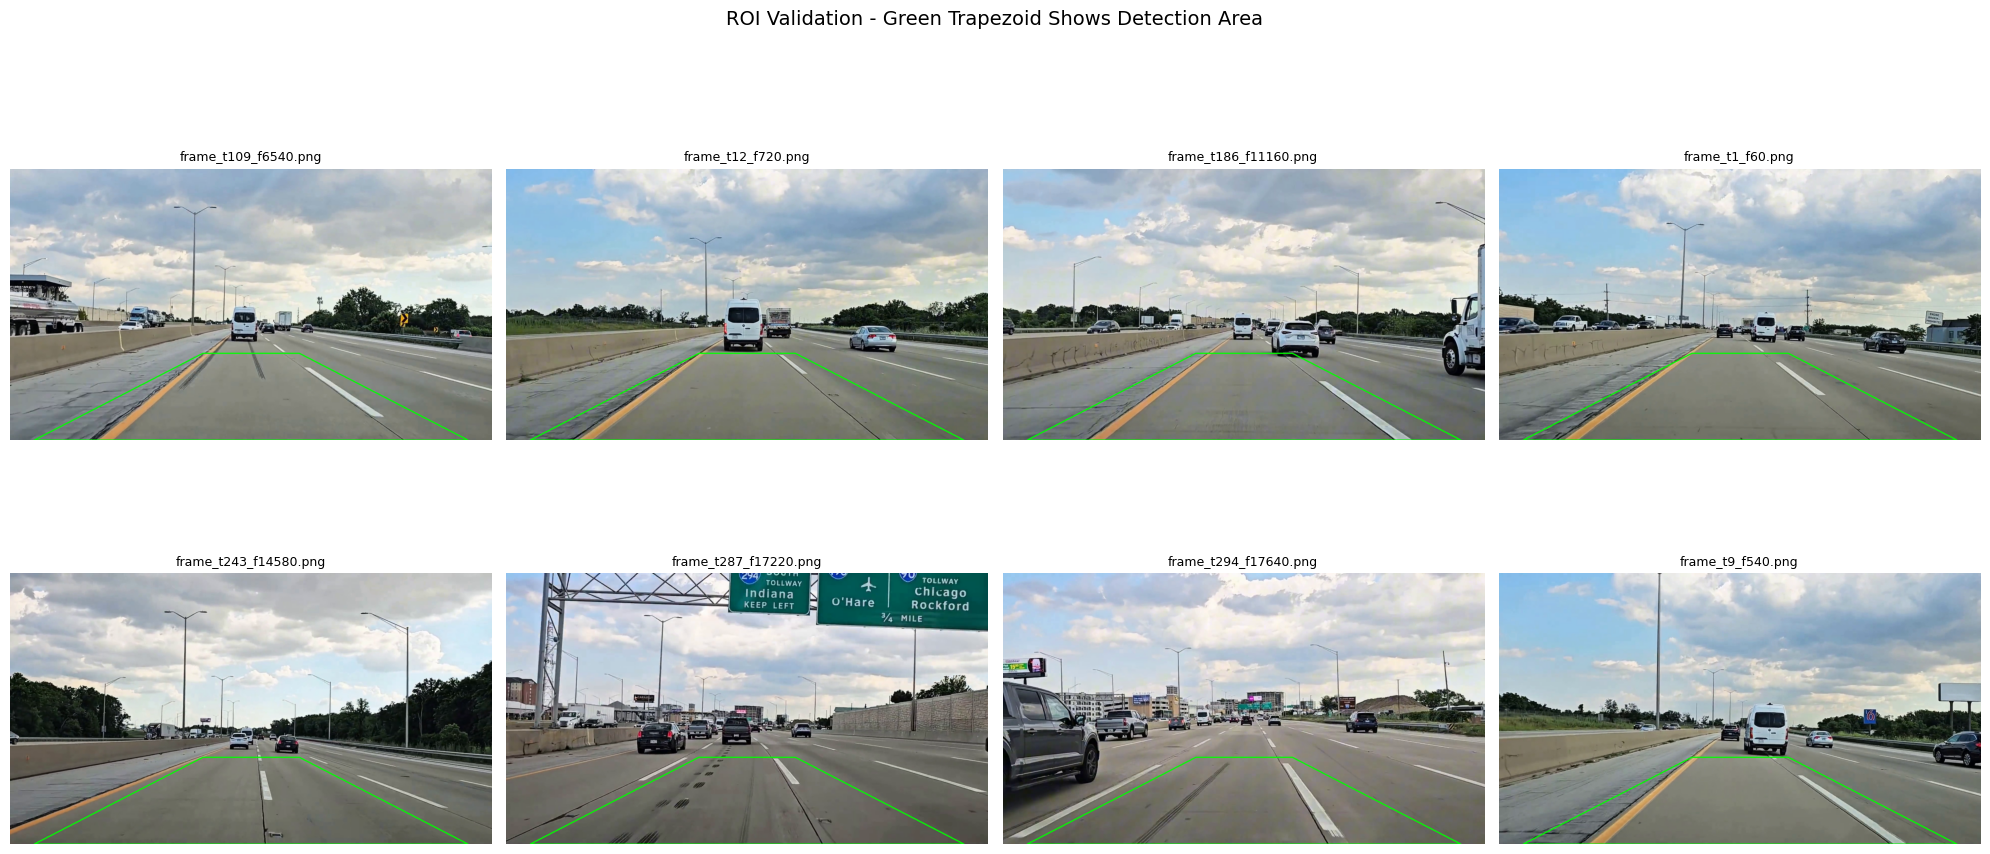

✓ ROI validated on all 8 test frames


In [4]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, frame_name in enumerate(test_frames):
    img = cv2.imread(os.path.join(frames_dir, frame_name))
    masked, roi_pts = apply_roi_mask(img)
    
    # Draw ROI outline on original frame
    vis = img.copy()
    cv2.polylines(vis, roi_pts, True, (0, 255, 0), 3)
    
    axes[idx].imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
    axes[idx].set_title(frame_name, fontsize=9)
    axes[idx].axis('off')

plt.suptitle("ROI Validation - Green Trapezoid Shows Detection Area", fontsize=14)
plt.tight_layout()
plt.show()

print(f"✓ ROI validated on all {len(test_frames)} test frames")

## 5. View Masked Results

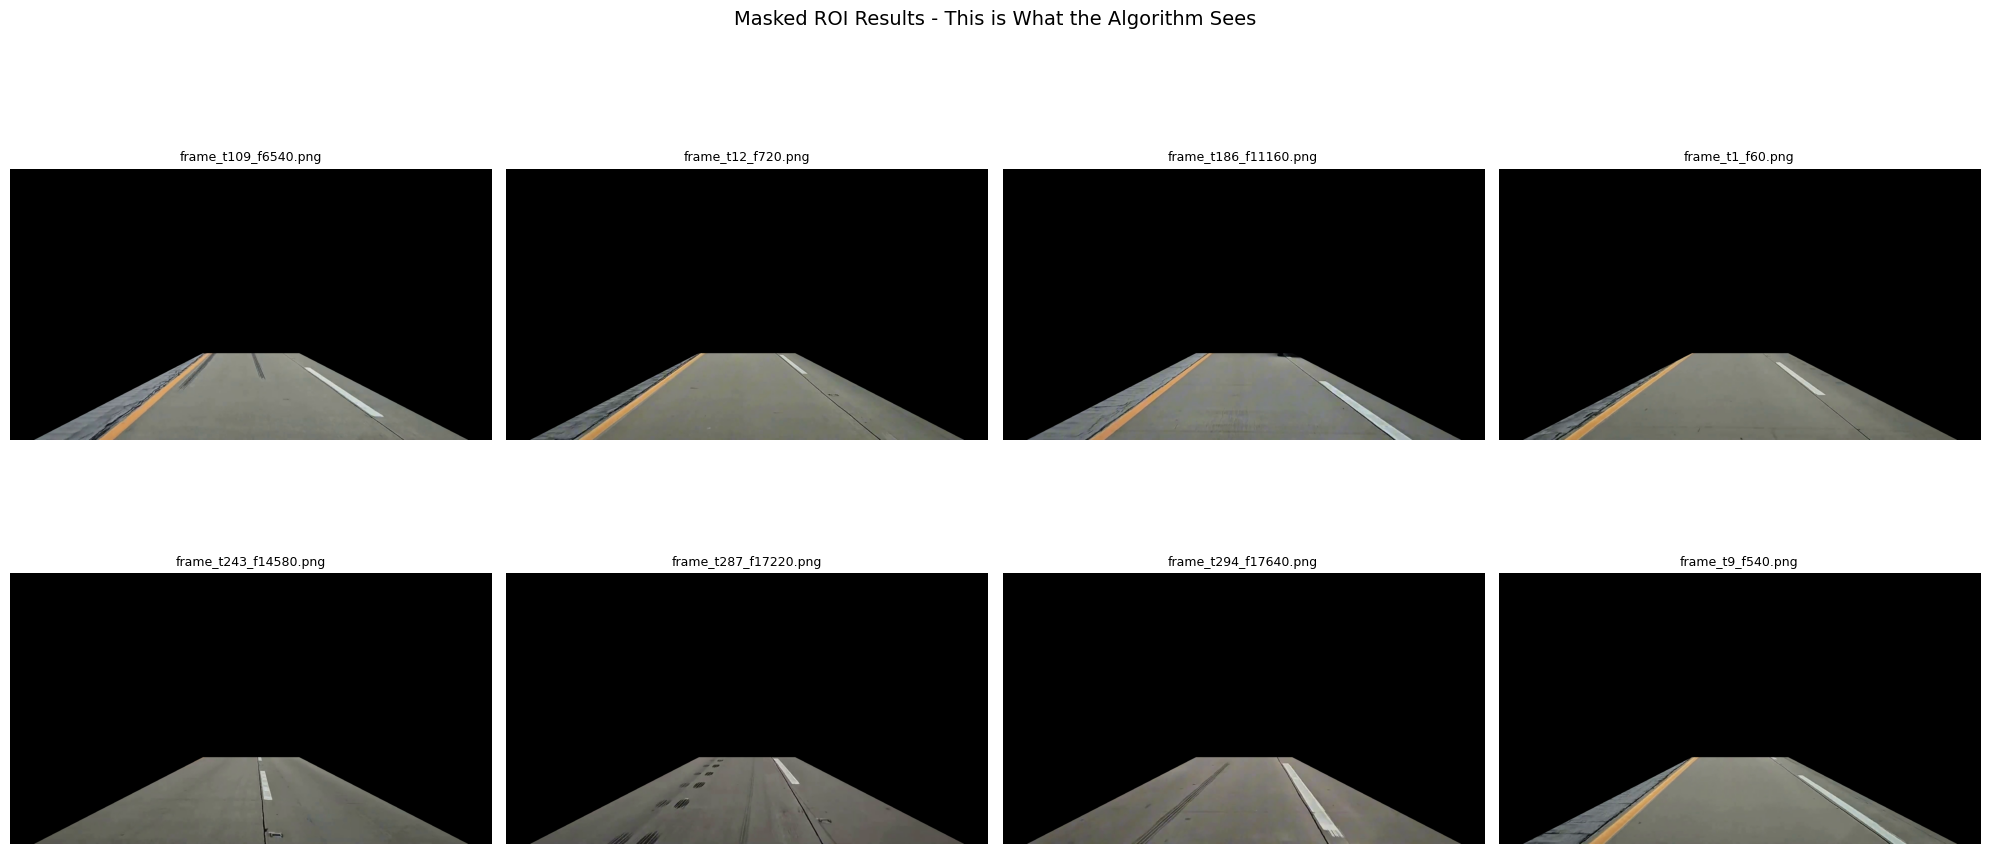

✓ Masked visualization complete for all 8 frames


In [5]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, frame_name in enumerate(test_frames):
    img = cv2.imread(os.path.join(frames_dir, frame_name))
    masked, roi_pts = apply_roi_mask(img)
    
    axes[idx].imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))
    axes[idx].set_title(frame_name, fontsize=9)
    axes[idx].axis('off')

plt.suptitle("Masked ROI Results - This is What the Algorithm Sees", fontsize=14)
plt.tight_layout()
plt.show()

print(f"✓ Masked visualization complete for all {len(test_frames)} frames")